In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt

lines = []
with open('./driving_log.csv') as csvfile:
	reader = csv.reader(csvfile)
	for line in reader:
		lines.append(line)

In [2]:
# find the address of left, right and center images
# and use that to read image and measurement data
images = []
measurements = []
correction = 0.2
for line in lines:
    filenames = []
    imagesPath = []
    for i in range(3):
        filename =  line[i].split('\\')[-1]
        filenames.append(filename)
        current_path = './IMG/' + filename
        imagesPath.append(current_path)
        # read images from imagesPath
    imageCenter = cv2.imread(imagesPath[0])
    imageCenter = cv2.cvtColor(imageCenter, cv2.COLOR_BGR2RGB)
    imageLeft = cv2.imread(imagesPath[1])
    imageLeft = cv2.cvtColor(imageLeft, cv2.COLOR_BGR2RGB)
    imageRight = cv2.imread(imagesPath[2])
    imageRight = cv2.cvtColor(imageRight, cv2.COLOR_BGR2RGB)
    
    measureCenter = float(line[3]) 
    measureLeft = float(line[3]) - correction
    measureRight = float(line[3]) + correction
    images.extend([imageCenter, imageLeft, imageRight])
    measurements.extend([measureCenter, measureLeft, measureRight])

In [3]:
# Augment data set by flipping all images
X_augment, y_augment = [], []
for x, y in zip(images, measurements):
	X_augment.append(x)
	y_augment.append(y)
	X_augment.append(cv2.flip(x,1))
	y_augment.append(y*(-1.0)) 

# turn all data into array 
X_train = np.array(X_augment)
y_train = np.array(y_augment)

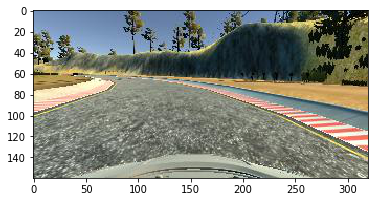

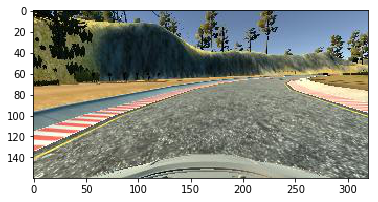

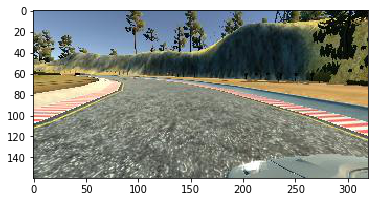

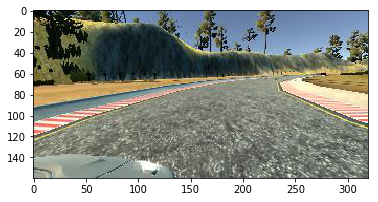

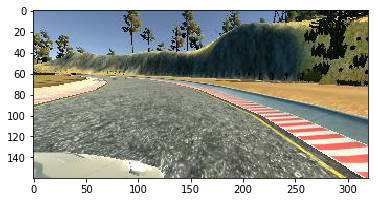

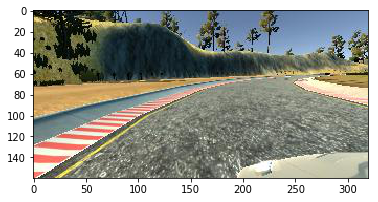

[ 0.  -0.  -0.2  0.2  0.2 -0.2]


In [4]:
img = X_train[0:6]
measure = y_train[0:6]
for i in range(6):
    plt.imshow(img[i])
    plt.show()
print(measure)

In [5]:
# import keras lib
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout, Cropping2D, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


model = Sequential()
# cropping the image topPixel from top and botPixel from bottom
topPixel = 70
botPixel = 25
model.add(Cropping2D(cropping=((topPixel, botPixel),(0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x/127.5 -1))

# The Following structrue is LeNet 
# First conv layer 6 filters with 5*5 kernel
# model.add(Convolution2D(6, 5, 5, border_mode='valid', activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.5))

# # Second conv layer 6 filters with 5*5 kernel
# model.add(Convolution2D(16, 5, 5, border_mode='valid', activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.5))

# # three fully connected layers
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(1))

# The Following structure is NVIDIA Model structure
model.add(Convolution2D(24,5,5, subsample=(2,2), border_mode='valid', init='he_normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(36,5,5, subsample=(2,2), border_mode='valid', init='he_normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(48,5,5, subsample=(2,2), border_mode='valid', init='he_normal',  activation='relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(64,3,3, subsample=(1,1), border_mode='valid', init='he_normal',  activation='relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(64,3,3, subsample=(1,1), border_mode='valid', init='he_normal',  activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1164,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# configure learning process 
model.compile(loss='mse', optimizer='adam')
# train the model with fixed number of epochs
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=10, show_accuracy=True)

# visualize the training loss and validation loss
#history_object = model.fit_generator(train_generator, samples_per_epoch=len(tra))
model.save('model.h5') 

Using TensorFlow backend.
D:\Applications\Miniconda\envs\carnd-term1\lib\site-packages\keras\models.py:654: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 25209 samples, validate on 6303 samples
Epoch 1/10
25209/25209 [==============================] - 76s - loss: 0.0836 - val_loss: 0.0390
Epoch 2/10
25209/25209 [==============================] - 73s - loss: 0.0418 - val_loss: 0.0390
Epoch 3/10
25209/25209 [==============================] - 70s - loss: 0.0416 - val_loss: 0.0390
Epoch 4/10
25209/25209 [==============================] - 67s - loss: 0.0416 - val_loss: 0.0390
Epoch 5/10
25209/25209 [==============================] - 53s - loss: 0.0416 - val_loss: 0.0390
Epoch 6/10
25209/25209 [==============================] - 69s - loss: 0.0415 - val_loss: 0.0390
Epoch 7/10
25209/25209 [==============================] - 72s - loss: 0.0416 - val_loss: 0.0390
Epoch 8/10
25209/25209 [==============================] - 71s - loss: 0.0416 - val_loss: 0.0390
Epoch 9/10
25209/25209 [==============================] - 72s - loss: 0.0415 - val_loss: 0.0390
Epoch 10/10
25209/25209 [==============================] - 69s - loss: 0.0416 - val_los